# Common Neural Network layers

*Authors: Dr. Oscar Castro, Dr. Pierrick Pochelu*

Neural Network applications are expanding with their capability to manage diverse data (not only vector)

Below are the most common deep learning algorithms.

Convolutional Neural Networks (CNNs)
* Core algorithm: **Convolution layer**
* Input Type: Spatial data. E.g., 1D signal such as sound, white&black image, colored image.
* How It Works: CNNs leverage convolution layers to capture spatial hierarchies, using filters (kernels) to detect features like edges, textures, colors, and shapes in images.
* Application examples: Image recognition, object detection, facial recognition, etc.


Graph Neural Networks (GNNs)
* Core algorithm: **Graph Convolution layer**
* Input Type: Graph-structured data, such as molecular graphs (atoms as nodes, bonds as edges), social networks (people as nodes, relationships as edges), or citation networks between documents, or URL between web pages.
* How It Works: GNNs learn node and edge features by iteratively aggregating and updating information from neighboring nodes and their connections (edges). Each node's representation is computed by aggregating features from its neighbors, capturing both local and global structural patterns. This allows GNNs to capture the relationships and dependencies between entities in non-Euclidean spaces.
* Application examples: Molecular property prediction (e.g., drug discovery), social network analysis, traffic prediction, knowledge graph completion, and protein structure prediction.


Auto-Regressive Neural Networks (Example: WaveNet)
* Core algorithm: **Auto-regression** (AR)
* Input Type: Sequential data, typically time-series data (e.g., stock prices, weather data, language).
* How It Works: ARNNs predict future values in a sequence based on a linear combination of prior observed values. The model generates outputs step-by-step, using its own previous predictions as inputs for the next time step. In neural networks, this is often implemented with architectures like RNNs, LSTMs, or Transformers, where the current output depends on previous outputs.
* Application examples: Speech synthesis (text-to-speech), and autoregressive image models (pixel-level image generation).

Recurrent Neural Network (E.g., Long Short-Term Memory Networks)
* Core algorithm: **Recurrent layers with memory cells**
* Input Type: Sequential data, e.g., time-series data (financial data, stock prices), language, and speech data.
* How It Works: LSTMs maintain a memory of past inputs through a system of gates (input, forget, output) that control the flow of information. This allows them to capture long-term dependencies in sequences without losing important context over time.
* Application examples: Time-series forecasting, stock prediction, machine translation, speech recognition, and video analysis.

Q-Learning / Reinforcement Learning
* Core algorithm: Off-policy temporal difference (TD) learning
* Input Type: Interaction data from an environment, typically represented as state-action pairs (S, A), where the agent takes actions in states and receives rewards.
* How It Works: Q-Learning is a reinforcement learning algorithm that seeks to learn the optimal action-selection policy by estimating the Q-values (expected cumulative reward) for each action in each state. The agent updates its Q-values using the Bellman equation based on the reward received from the environment and the maximum future Q-value for the next state. Over time, the agent learns to choose the action that maximizes the cumulative reward, forming an optimal policy.
* Application examples: Robotics control, autonomous navigation, resource management in complex environments, chess.




Physics-Informed Neural Networks (PINNs)
* Core idea: Integration of physical laws (Partial Differential Equations, PDEs) into neural network training
* Input Type: Data governed by physical phenomena, often represented through differential equations. Examples include systems like fluid dynamics, structural mechanics, and heat transfer.
* How It Works: PINNs incorporate known physical laws, expressed as PDEs, directly into the loss function of the neural network. During training, the network not only fits observed data but also minimizes a term representing the residual of the governing equations (e.g., Navier-Stokes for fluid flow). This enables PINNs to make physically consistent predictions, even with sparse or noisy data, by embedding these constraints into the model.
* Application examples: Simulating fluid flows, solving inverse problems in engineering, weather prediction, modeling heat transfer, and structural mechanics simulations.

Concept of Tensors: Tensors are mathematical objects that generalize scalars, vectors (1D), and matrices (2D) to higher dimensions. 

Graph Representation: Neural networks can be visualized as directed graphs:
* Nodes represent tensor operations (e.g., multiplication, addition).
* Edges represent the flow of information (data) between these operations.



Topology of Neural Networks: The specific structure or topology is designed to balance various considerations:
* Prediction Quality: Aim to minimize overfitting (model too complex) and underfitting (model too simple).
* Training/Inference Time: Efficiency in both training the model and making predictions.
* Memory Consumption: Ensuring the model fits within computational limits.
* Simplicity: Keeping the architecture as simple as possible while achieving good performance.

Neural network layers can be viewed as sub-graphs within the overall neural network structure, each designed to perform specific functions. Here are the examples you provided:

# Convolution

A convolution is a mathematical operation that takes an input data (such as an image or signal) and a kernel (a small matrix). It produces an output that captures the interaction between the two. It highlights features or patterns in the input data.

## 1D Convolution

Illustration:
![Example Image](conv.png)

In [1]:
%%load_ext memory_profiler # usefull for profiling mem. consumption

UsageError: Cell magic `%%load_ext` not found (But line magic `%load_ext` exists, did you mean that instead?).


Forward:

In [2]:
import numpy as np

In [3]:
x=[2.0, 2.1, 2.2, 2.3, 7.6, 7.5, 7.4, 7.3] # input signal
k=[-1., 0, 1.] # kernel

In [4]:
def convolution(x, kernel):
    Y = []
    kernel_half=len(kernel)//2
    for i in range(len(x)): # O(N)
        if i>=kernel_half and i<len(x)-kernel_half : #<--- skip computation when out of the boundaries
            window = x[i-kernel_half : i+ kernel_half + 1] # when Python slicing e.g. x[a:b] a is inclusive and b exclusive
            y_i = np.dot(window, kernel) # dot product O(K)
            #y_i = round(y_i, 6)
            Y.append(y_i)
    return Y

In [5]:
print(convolution(x,k))  
# O((N-K//2)*K)

# K is small and constant

# O(n)

[0.20000000000000018, 0.19999999999999973, 5.3999999999999995, 5.2, -0.1999999999999993, -0.20000000000000018]


Fitting a 1D convolution kernel:

In [5]:
import jax
import jax.numpy as jnp
from jax import grad

def convolution_1d_jax(x, kernel):
    kernel_half = len(kernel) // 2
    Y = []
    for i in range(len(x)):  # Loop over input data
        if i >= kernel_half and i < len(x) - kernel_half:
            window = x[i - kernel_half : i + kernel_half + 1]  # Extract window
            y_i = jnp.dot(window, kernel)  # Compute dot product
            Y.append(y_i)
    return jnp.array(Y)


ModuleNotFoundError: No module named 'jax'

In [7]:
x=jnp.array([2.0, 2.1, 2.2, 2.3, 7.6, 7.5, 7.4, 7.3])  # input
y=jnp.array([0.2, 0.2, 5.4, 5.2, -0.2, -0.2]) # expected output

k=jnp.array([0.1, 0.2, -0.3]) # initiliaze a kernel randomly (or "kernel", "weight", "parameters", "trainable variables")

def loss_fn(k, x, y_true):
    y_pred = convolution_1d_jax(x, k)
    return jnp.mean((y_pred - y_true) ** 2) # scalar

grad_loss_fn = grad(loss_fn)

for epoch in range(100):
    
    grads = grad_loss_fn(k, x, y)
    
    k -= 0.01 * grads #  descent the loss

    # Print loss every 10 epochs
    if epoch % 10 == 0:
        loss_val = loss_fn(k, x, y)
        print(f'Epoch {epoch}, Loss: {loss_val:.6f}')

print(k)

# O((N-K//2)*K)*E)
# in the case where the edge is constant and "small" (e.g. 3):  O(N)

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


Epoch 0, Loss: 10.569812
Epoch 10, Loss: 2.080700
Epoch 20, Loss: 0.501841
Epoch 30, Loss: 0.122107
Epoch 40, Loss: 0.030179
Epoch 50, Loss: 0.007706
Epoch 60, Loss: 0.002097
Epoch 70, Loss: 0.000636
Epoch 80, Loss: 0.000224
Epoch 90, Loss: 0.000092
[-1.0014079   0.00423985  0.99724495]


Decomposition of the 1D convolution training for future parallelization

In [8]:
global_x=jnp.array([2.0, 2.1, 2.2, 2.3, 7.6, 7.5, 7.4, 7.3])  # input
global_y=jnp.array([0.2, 0.2, 5.4, 5.2,-0.2, -0.2]) # expected output

x1=jnp.array([2.0, 2.1, 2.2, 2.3])
y1=jnp.array([0.2, 0.2])

x2=jnp.array([2.2, 2.3, 7.6, 7.5, 7.4, 7.3])
y2=jnp.array([5.4, 5.2, -0.2, -0.2])

k=jnp.array([0.1, 0.2, -0.3]) # initiliaze a kernel randomly (or "kernel", "weight", "parameters", "trainable variables")

def loss_fn(k, x, y_true):
    y_pred = convolution_1d_jax(x, k)
    return jnp.mean((y_pred - y_true) ** 2) # scalar

grad_loss_fn = grad(loss_fn)


local_db=[(x1,y1), (x2,y2)]

for epoch in range(100):
    local_grads=[]
    for x, y in local_db: # <--- PARALLEL FOR
        local_grad = grad_loss_fn(k, x, y)
        local_grads.append(local_grad)
        
    # we aggregate gradients with weigthed averaging because the loss is an average    
    grads=((local_grads[0]*len(y1))+local_grads[1]*len(y2))/(len(y1)+len(y2))
    
    k -= 0.01 * grads #  descent the loss

    # Print loss every 10 epochs
    if epoch % 10 == 0:
        loss_val = loss_fn(k, global_x, global_y)
        print(f'Epoch {epoch}, Loss: {loss_val:.6f}')


# # O((((N-K//2)*K)//P)*E)) with N input data size, K kernel size, E number of training iterations (or "epoch"), P CPU cores 
print(k)

Epoch 0, Loss: 10.569813
Epoch 10, Loss: 2.080700
Epoch 20, Loss: 0.501841
Epoch 30, Loss: 0.122107
Epoch 40, Loss: 0.030179
Epoch 50, Loss: 0.007706
Epoch 60, Loss: 0.002097
Epoch 70, Loss: 0.000636
Epoch 80, Loss: 0.000224
Epoch 90, Loss: 0.000092
[-1.0014079   0.00423983  0.99724495]


# 2D Convolution

Illustration of convolution_2D(input_signal, kernel)

with 

```
input_signal=[[1,1,1,0,0],
              [0,1,1,1,0],
              [0,0,1,1,1],
              [0,0,1,1,0],
              [0,1,1,0,0]]
kernel=[[1,0,1],
        [0,1,0],
        [1,0,1]]

output=[[4,3,4],
        [2,4,3],
        [2,3,4]]
```
![Example Image](conv.gif)

```

input signal size: H, W
kernel size: kH, kW

padding size:
pH=kH//2
pW=kW//2

Complexity:
O((H-pH) * (W-pW) * kH * kW)

if kernel is constant and "small".

O(H * W)

We can assume H and W are approximately the same shape

O(N²)
```

Image as Python array


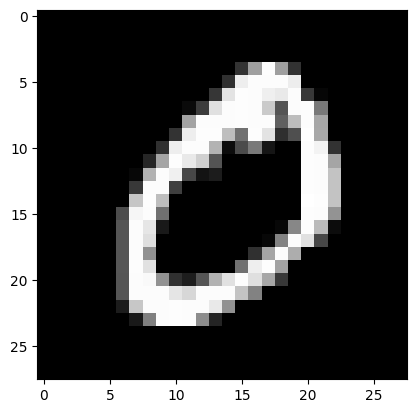

Image as Python array
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x=x_train[1] # Select the second image

# Visualize the image
print("Image as Python array")
plt.imshow(x, cmap='gray')
plt.show()

# Print as python data structure
print("Image as Python array")
print(x)

In [10]:
def convolution_2d(x, kernel):
    # Get dimensions of the input data and kernel
    input_height = len(x)
    input_width = len(x[0])
    kernel_height = len(kernel)
    kernel_width = len(kernel[0])
    
    # Calculate the padding size
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    
    # Initialize the output matrix
    output_data = np.zeros((input_height, input_width)) # O(N*N) in memory
    
    # Perform the convolution operation
    for i in range(input_height): # Loop N times
        for j in range(input_width): # In overall, it loops H*W times
            # Check boundaries for padding
            if (i >= pad_height and i < input_height - pad_height and
                j >= pad_width and j < input_width - pad_width):
                
                # Extract the region of interest
                region = x[i - pad_height:i + pad_height + 1,
                                    j - pad_width:j + pad_width + 1]
                
                # Perform the convolution patch operation (element-wise multiplication and sum)
                output_data[i, j] = np.sum(region * kernel) # this line is O(kH*kW) but repeated H*W
    
    return output_data

In [11]:
kernel = np.array([[0, 0, 0],
                   [-1, 0, 1],
                   [0, 0, 0]]) # <--- horizontal edge detection
#kernel = np.array([[0, 0, 0],
#                   [-1, 0, 1],
#                   [0, 0, 0]]) # <--- vertical edge detection

y=convolution_2d(x, kernel) # O(H*W*kH*kW)  if k is short, and if H=W -> O(n²).

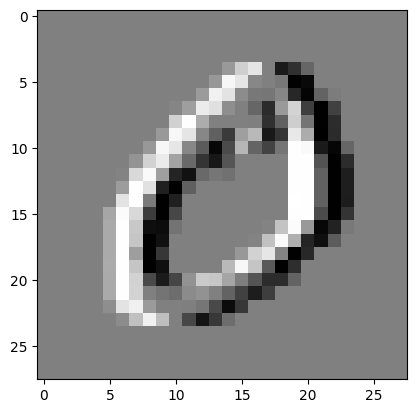

In [12]:
plt.imshow(y, cmap='gray')
plt.show()

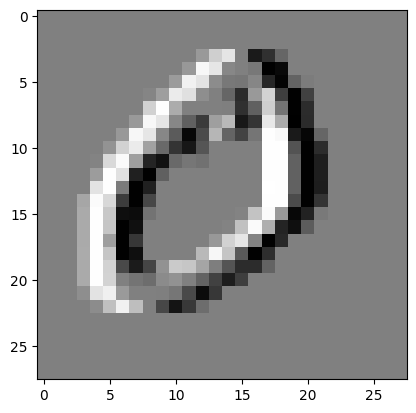

In [13]:
kernel = np.array([[0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 1]]) # <--- shift 2px right, 1px bottom

y=convolution_2d(y, kernel)

plt.imshow(y, cmap='gray')
plt.show()

## 3D Convolution

3D appplications involves video-stream (2D spatial+1D temporal), medical (e.g., CT-scan), geological data (e.g., sub-surface data), X-ray tomography ...

Time Complexity: O((H-(kH//2)) * (W-kW//2) * (D-kD//2) * kH * kW * kD) 

* H, W, D: Height, width, and depth of the input volume (e.g., for a video: height, width, and time).
* kH, kW, kD: Height, width, and depth of the kernel (filter).


## 2D Convolution of a RGB image

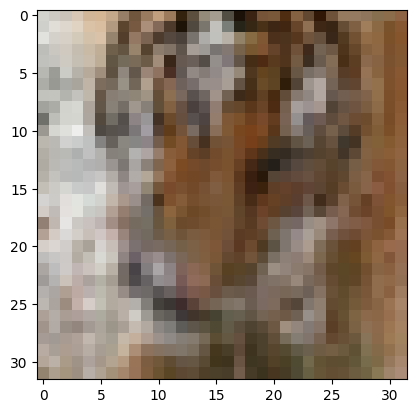

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode="fine")

# CIFAR-100 fine labels (100 classes)
label_names = ["apple", "aquarium_fish", "baby", "bear", "beaver", "bed", "bee", "beetle", "bicycle", "bottle", "bowl", "boy", "bridge", "bus", "butterfly", "camel", "can", "castle", "caterpillar", "cattle", "chair", "chimpanzee", "clock", "cloud", "cockroach", "couch", "crab", "crocodile", "cup", "dinosaur", "dolphin", "elephant", "flatfish", "forest", "fox", "girl", "hamster", "house", "kangaroo", "keyboard", "lamp", "lawn_mower", "leopard", "lion", "lizard", "lobster", "man", "maple_tree", "motorcycle", "mountain", "mouse", "mushroom", "oak_tree", "orange", "orchid", "otter", "palm_tree", "pear", "pickup_truck", "pine_tree", "plain", "plate", "poppy", "porcupine", "possum", "rabbit", "raccoon", "ray", "road", "rocket", "rose", "sea", "seal", "shark", "shrew", "skunk", "skyscraper", "snail", "snake", "spider", "squirrel", "streetcar", "sunflower", "sweet_pepper", "table", "tank", "telephone", "television", "tiger", "tractor", "train", "trout", "tulip", "turtle", "wardrobe", "whale", "willow_tree", "wolf", "woman", "worm"]

# Find the index of 'tiger' class in the label_names
selected_class_index = label_names.index('tiger')

# Get all the indices of zebra images
selected_indices = np.where(y_train == selected_class_index)[0]
image = x_train[selected_indices[4]]


plt.imshow(image)
plt.show()



In [15]:
def convolution_2d_rgb(x, kernel):
    
    input_height, input_width, input_channels = x.shape
    kernel_height, kernel_width, input_channels, output_channels = kernel.shape
    
    # Calculate the padding size
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    
    # Initialize the output matrix for ch_out channels
    output_data = np.zeros((input_height, input_width, output_channels)) # O(N*N*ch_out) in memory
    
    # Perform the convolution operation
    for i in range(pad_height, input_height - pad_height): # Loop over height
        for j in range(pad_width, input_width - pad_width): # Loop over width
            
            # Extract the region of interest (roi)
            region = x[i - pad_height:i + pad_height + 1,
                       j - pad_width:j + pad_width + 1]
            # region is (k, k, input_channels)
            
            output_pixel = np.zeros((3,),dtype=np.float32)
            for ki in range(len(region)):
                for kj in range(len(region[0])):
                    window_element_out=np.dot(region[ki][kj][:][:] , kernel[ki][kj][:][:] )
                    output_pixel+=window_element_out
            
            
            # Assign the computed value to the output
            output_data[i, j] = output_pixel
    
    return output_data


In [16]:
kernel = np.zeros((3, 3, 3, 3), dtype=np.float32) # TENSOR 4D 2 spatial coordinates, input_channels (RGB: 3), output_channels ()
kernel[1][1][1][0]=1. # the green (input) become red (output)
kernel[1][1][0][1]=1. # the red (input) become green (output)
kernel[1][1][2][2]=1. # the blue stay blue

y = convolution_2d_rgb(image/255., kernel) # O(N*N*K*K*C*C)

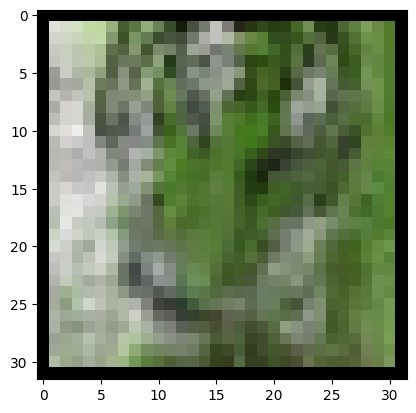

In [17]:
plt.imshow(y)
plt.show()

## Graph convolution

The key idea in Graph Convoltion is that a node's representation reflect:
* its own features
* and the features of its neighbors. 

This reflects a real-world concept: things that are connected tend to be related or influence each other.

For example:

* In a social network, people with similar interests (music, books, fashion, etc.) are more likely to be friends and influenced each other.
* In a citation network, a document's significance might be influenced/correlated by the document it cites.


It consists in 2 steps:

    1. Linear combination: nodes[i]=np.dot(k, nodes[i])
    
    2. Aggregation: nodes2 = np.dot(Adjacency(nodes), nodes)


with:
* n nodes and f_in charateristics
* k is the kernel, a matrix (f_in, f_out)
* nodes2 n nodes and f_out characteristics

### Aggregation principle

In [18]:
# Let's consider a graph of 3 nodes: Alice, Bob, and Charlie.
# The graph looks: Alice<->Bob<->Charlie

X=np.array([
    [10, 1], # Alice feature vector is [10, 1]
    [20, 0], # Bob feature vector is [20, 0]
    [30, 0]  # Charlie feature vector is [30, 0]
]) # memory: O(n*f) with n nodes and f features on each node

A=np.array([
    [0, 1, 0], # Alice and bob are connected but not Charlie
    [1, 0, 1], # Bob is connected to Alice and Charlie
    [0, 1, 0], # Charlie is connected to Bob
]) # memory O(n*n) with n nodes

y=np.dot(A, X) # Time: O(n² * f)
print(y) # memory: O(n*f)

[[20  0]
 [40  1]
 [20  0]]


Notice: The input to the graph convolution is in the same format as the output: (n,f).

We can also propagate the information multiple times, allowing for the propagation of information.

In [19]:
y2=np.dot(A, y) # A second move
print(y2)

[[40  1]
 [40  0]
 [40  1]]


We can customize the behavior by processing the adjacency matrix.
Customization #1: we add self-connection for not forgetting about the features (removing the "swap effect").

In [20]:
A=np.array([
    [1, 1, 0], # Same matrix but with '1' diagonal
    [1, 1, 1],
    [0, 1, 1],
])

y=np.dot(A, X) 
print(y)

[[30  1]
 [60  1]
 [50  0]]


Customization #2: Nodes are averaging instead of summing information

In [21]:
A=np.array([
    [0.5, 0.5, 0],
    [1./3, 1./3, 1./3],
    [0, 0.5, 0.5],
])
y=np.dot(A, X) 
print(y)

[[15.          0.5       ]
 [20.          0.33333333]
 [25.          0.        ]]


Conclusion: Just by changing the adjacency matrix we can modify the behaviour of the propagation.

### Graph convolution computing

Remember,

It consists in 2 steps:
    1. Linear combination nodes[i]=np.dot(k, nodes[i])
    2. Aggregation nodes = np.dot(Adjacency(nodes), nodes)

In [22]:
import numpy as np


def plot_graph(adj_matrix, node_values, plot_title):
    import networkx as nx
    from matplotlib import pyplot as plt
    
    # Create the graph from the adjacency matrix
    G = nx.from_numpy_array(adj_matrix)

    # Create a dictionary to map node index to its values for labeling
    node_labels = {i: str(node_values[i]) for i in range(len(node_values))}

    # Generate positions for the graph layout
    pos = nx.spring_layout(G)  # Spring layout for better visualization

    # Plot the graph
    plt.figure(figsize=(8, 6))

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=700)

    # Draw edges
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color='gray')

    # Draw labels for nodes (their feature vectors or values)
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=12)

    # Turn off the axis and show the plot
    plt.title(plot_title)
    #plt.axis("off")
    plt.show()

# Normalize the adjacency matrix
def process_adjency(A):
    identity_matrix = np.eye(A.shape[0])
    A_hat = A + identity_matrix  # Add self-loops for memorization of the own feature
    return A_hat

def graph_convolution_with_display(A_hat, X, W):

    plot_graph(A_hat, X, " Before graph conv")
    
    # STEP 1: Linear combination
    nodes_vec=[]
    for node_vec in X:  # N nodes
        node_vec = np.dot(node_vec, W) # Vector is (f_in) Matrix is (f_in,f_out) O(f_in*f_out)
        nodes_vec.append( node_vec )
    nodes_vec=np.array(nodes_vec) # convert into numpy array
    # overall step: O(N*f_in*f_out) with N the number of nodes, f_in & f_out the number of features in & out.
    
    
    plot_graph(A_hat, nodes_vec, " After step-1")
    
    # STEP 2 : Aggreation
    res_vectors=[] 
    for A_hat_row in A_hat:
        res_vec = np.dot(A_hat_row, nodes_vec)
        res_vectors.append( res_vec )
    res_vectors=np.array(res_vectors)
    # O(N²*f_out)
    
    
    plot_graph(A_hat, res_vectors, " After graph conv")
    
    return res_vectors

    # Question: What is the Big-O notation of graph convolution ?
    # O( max(N*f_in*f_out ,  N²*f_out ) )

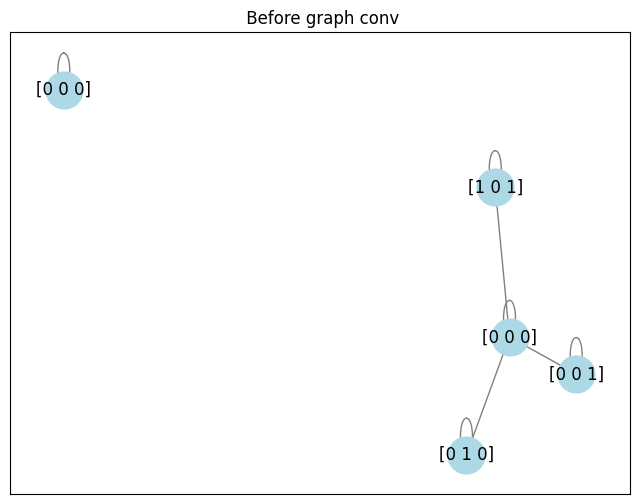

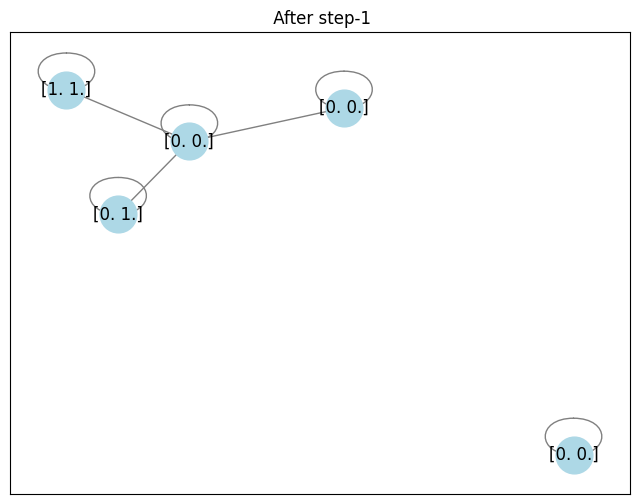

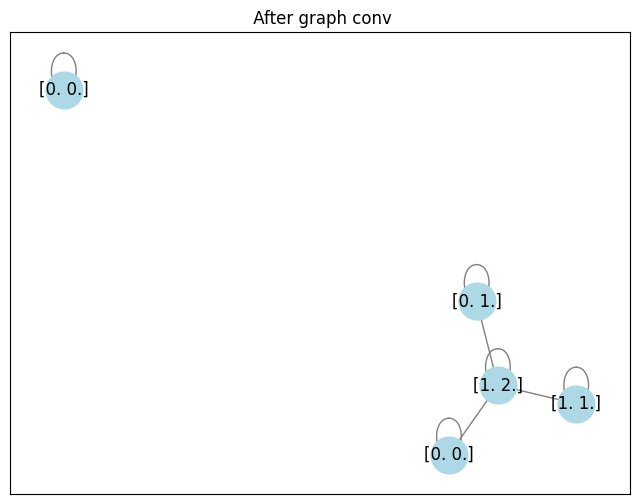

In [23]:
# Example adjacency matrix (5 nodes)
Adjacency = np.array([[0, 1, 0, 0, 0],  # Node 0 is connected to Node 1
                      [1, 0, 1, 1, 0],  # Node 1 is connected to Nodes 0, 2, and 3
                      [0, 1, 0, 0, 0],  # Node 2 is connected to Node 1
                      [0, 1, 0, 0, 0],  # Node 3 is connected to Node 1
                      [0, 0, 0, 0, 0]])  # Node 4 is isolated (no connections)

# Normalize adjacency matrix
A_hat = process_adjency(Adjacency)


# Example node feature matrix (5 nodes, 3 features per node)
X = np.array([[1, 0, 1],  # Features for Node 0
              [0, 0, 0],  # Features for Node 1
              [0, 1, 0],  # Features for Node 2
              [0, 0, 1],  # Features for Node 3
              [0, 0, 0]]) # Features for Node 4


# Weight matrix (input_dim = 3, output_dim = 2)
W = np.array([[1, 0],  # Transforming [x, y, z] into [x, z]
              [0, 0],
              [0, 1]], dtype=np.float32)

y=graph_convolution_with_display(A_hat, X, W)

Question 1: Can we repeat this graph_conv ? on X (the output becomes the input of the conv)
No because the convolution expects 3 characteristics for each node.

Question 2: Complexity of Graph Convolution ?
O( max(N*f_in*f_out ,  N²*f_out ) )

Question 3: How can we use the HPC ?
* Training on 1 big graph (memory parallelism):
    * 1 big graph (tensor-parallelism) 
* Training faster:
    * 1 big graph (tensor-parallelism) 
    * Many graph (data-parallelism) with Parallel Stochachastic Gradient Descent

**What about real-world graph data for ML ?**

URL : https://ogb.stanford.edu/docs/dataset_overview/

* 1 dataset may contains millions of graphs.
* 1 graph may contains millions of nodes and edges.
* What about the sparsity ?
    * How to measure it ?
    * What is the consequence on the aggregation computing ?
    * How to manage it ?
    
    ==> Sparse arithmetic


Generate a synthetic large-scale graph

In [12]:
import numpy as np

num_nodes=20000
num_edges=40000
num_feat=1000

edges=np.random.randint(0, num_nodes,(num_edges, 2,)) # warning: some redudant edges are possible
nodes=np.random.uniform(-1., 1., (num_nodes, num_feat))

Standard aggregation

In [16]:
%time

# Adjacency matrix creation
A=np.zeros((num_nodes, num_nodes)) # memory: O(N*N)
for e1, e2 in edges: # Compute: O(E)
  A[e1][e2]=1.
  A[e2][e1]=1.

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 6.44 µs


In [17]:
%%time

# A is NxN and `nodes` NxF

res=np.dot(A, nodes) # computation: O(N*N*F) 

print(res[0][5])

-1.023858333260211
CPU times: user 31.4 s, sys: 7.87 s, total: 39.3 s
Wall time: 2.85 s


Aggregation with Adjacency matrix into a COO (Coordinate List) format

In [20]:
%%time

A=dict()
A["row"]=[]
A["col"] = []
A["val"] = []

# Fill the COO representation with edges
for e1, e2 in edges:  # memory: O(E), computation: O(E) where E is the number of edges
    A["row"].append(e1)
    A["col"].append(e2)
    A["val"].append(1.)

    A["row"].append(e2)
    A["col"].append(e1)
    A["val"].append(1.)

CPU times: user 62.7 ms, sys: 2.06 ms, total: 64.7 ms
Wall time: 63.2 ms


In [22]:
%%time

# PSEUDO CODE: 
# for all i, y[row[i]]+=val[i]*X[col[i]] # matrix-vec dot product in COO (Coordinated Format)
# cumul of multiplication a vector by a scalar

res = np.zeros((num_nodes, num_feat))
num_arcs=len(A["row"])
for i in range(num_arcs): 
    e1 = A["row"][i]
    e2 = A["col"][i]
    val = A["val"][i] # scalar `1`
    col=nodes[e2] # `F` length vector
    mul_col=val*col # multiplication all along the column
    res[e1] += mul_col # O(F) cumul the colum on the selected `e1` row
    
# Matrix dot into O(E*F) instead of O(N*N*F) !!!!!
print("First node features: ", res[0][5])

First node features:  -1.023858333260211
CPU times: user 323 ms, sys: 126 ms, total: 450 ms
Wall time: 448 ms


# Model on sequential data

The popular LSTM (Long-Short Term Memory) is a kind of RNN.

## Auto-Regressive Mode

This process is repeated for predicting `n` values in the future:
* Prediction at t+1 using a linear combination of the current window of timesteps.
* The predicted value is then added to the window, while the oldest value is removed.

In [23]:
# the input window: 3 timesteps, 2 variables (or "features")
# Ex: predicting temp. and humid. at t with history  t-1, t-2, t-3.
X=np.array([[0.1, 0.4], [0.1, 0.5], [0.1, 0.6]]) # first var. const to 0.1, 0.6

# W is input_time_steps*variables x variables
W = np.array([[0., 0., 0. , 0., 0., 0.],[ 0, 0, 0, 0., 0., 1.]]) 
b = np.array([[0.1]])
horizon = 5

In [29]:
def forecast_1step(X_flatten, W, b):
    return np.dot(W, X_flatten) + b

def forecast(horizon, X, W, b):
    X=X.copy()
    result = []
    
    # Forecast future values
    for t in range(horizon):  # Loop over 'n' future time steps to forecast
        
        # Predict the next value as the linear combination of the last 'window_size' timesteps
        X_flatten=X.flatten()
        y_next = forecast_1step(X_flatten, W, b)
        
        # Append the predicted value to the known data
        # Create a new window with the latest prediction
        for i in range(len(X)-1):
            X[i] = X[i+1]
        X[len(X)-1]=y_next  # Shift the window to exclude the oldest timestep
        
        result.append(y_next)  # Store the predicted timestep
        
    return result  # Return the list of forecasts

In [30]:
y=forecast(10, X, W, b)
print(y) # horizon x characteristics

[array([[0.1, 0.7]]), array([[0.1, 0.8]]), array([[0.1, 0.9]]), array([[0.1, 1. ]]), array([[0.1, 1.1]]), array([[0.1, 1.2]]), array([[0.1, 1.3]]), array([[0.1, 1.4]]), array([[0.1, 1.5]]), array([[0.1, 1.6]])]


TRAINING

In [30]:
import jax
import jax.numpy as jnp

X=jnp.array([[0.1, 0.4], [0.1, 0.5], [0.1, 0.6]]) # input example
y=jnp.array([[0.1, 0.7]]) # expected output
W = jnp.array([[0., 1., 0. , 1., 0., 1.],[ 0., 1., 0, 1., 0., 1.]]) # random
b = jnp.array([[0., 1.]]) # random

def forecast_1step(X,W,b):
    # JAX does not support in-place operations like numpy, so use jax.numpy and functional updates.
    #X = X.copy()  # Copy the input data to avoid modifying the original data
    X_flatten = X.flatten()
    y_next = jnp.dot(W, X_flatten) #+ b
    return y_next

def forecast(horizon, X, W, b):
    result = []
    
    # Loop over 'horizon' to predict future values
    for t in range(horizon):
        X_flatten = X.flatten()  # Flatten the window for dot product
        
        # Get the next prediction
        y_next = forecast_1step(X_flatten, W, b)
        
        # Update X by shifting rows and adding the new prediction in the last row
        X = jnp.roll(X, shift=-1, axis=0)  # Shift rows to the left
        X = X.at[-1].set(y_next)  # Update the last row with the new prediction
        
        # Append the prediction to results
        result.append(y_next)
    
    return jnp.array(result)

def forecast_1step_with_loss(params, X, y):
    W, b = params
    y_next=forecast_1step(X, W, b)
    return jnp.sum((y_next-y)**2)

print("Prediction before: ", forecast_1step(X,W,b))

# Training procedure
grad=jax.grad(forecast_1step_with_loss)
def training_loop(grad, num_epochs, W, b, X, y):
    for i in range(num_epochs):
        delta=grad((W, b),X, y)

        W -= 0.1*delta[0]
        b -= 0.1*delta[1]
    return W, b

W, b=training_loop(grad, 100, W, b, X, y)
print("Prediction after: ", forecast_1step(X,W,b))

Prediction before:  [1.5 1.5]
Prediction after:  [0.10000006 0.7000001 ]


In [31]:
forecast(10, X, W, b)

Array([[0.10000006, 0.7000001 ],
       [0.13750005, 0.85000026],
       [0.16593756, 1.0162503 ],
       [0.19483607, 1.2111567 ],
       [0.23427574, 1.4527608 ],
       [0.2794981 , 1.7369281 ],
       [0.33408913, 2.0769851 ],
       [0.40071914, 2.4861288 ],
       [0.47889182, 2.973671  ],
       [0.5727809 , 3.5573545 ]], dtype=float32)

Question, how to parallel the prediction ?
* idea 1: Parallelize the linear product
* idea 2: using many independant forecasters to create different forcast. Aggregate the predictions to compute different quantiles (e.g., the 10th, 50th, and 90th percentiles).

**In real applications to predict the future**

==> Ensemble of Forecasters

In [45]:
num_forecaster=3
noise_std=0.1

for i in range(num_forecaster):
    
    key = jax.random.PRNGKey(i) # `i` random see 
    W_noise = jax.random.normal(key, W.shape) * noise_std
    b_noise = jax.random.normal(key, b.shape) * noise_std
    
    W_init = W+W_noise
    b_init = b+b_noise
    
    W, b=training_loop(grad, 20, W_init, b_init, X, y)
    
    print(f"Prediction forcaster {i}: ", forecast(5,X,W,b))
    
# Example of statistics: 1000 forecasters: 5th percentile, mediane, 95th

Prediction forcaster 0:  [[0.1024966  0.6972549 ]
 [0.13233401 0.8387149 ]
 [0.15077163 0.9999051 ]
 [0.17964125 1.1924535 ]
 [0.21549703 1.4226627 ]]
Prediction forcaster 1:  [[0.09584314 0.7038807 ]
 [0.12316558 0.8521904 ]
 [0.14237612 1.0203512 ]
 [0.17086743 1.2288455 ]
 [0.20485432 1.4760363 ]]
Prediction forcaster 2:  [[0.09874725 0.7060589 ]
 [0.12187524 0.85363656]
 [0.13513349 1.0246413 ]
 [0.1606953  1.2389716 ]
 [0.19014463 1.4907697 ]]


Many unbiased forcasters: more insigths, robust statistically
==> Need HPC for managing independant forecasters

## Recurrent Model

Key idea:

In its simplest form, 3 linear combinations:
* Processing the Current Input *U*: This transformation updates the hidden state based on the current input *x*. U=W*x+b
* Processing the Previous Hidden State *h* (or "memory"): This linear transformation updates the hidden state based on the previous hidden state *h_1*. h=np.dot(Wh,h_1) + U
* Compute the prediction: y=Wo*h+bo


In [34]:
import numpy as np



# Example input sequence (seq_length x input_dim)
x = np.array([
    [0.1, 0.2],  # x_0
    [0.4, 0.5],  # x_1
    [0.7, 0.8]   # x_2
])

# Example weights and biases
W_u = np.array([[0.5, 0.3, 0.1],   # Weights from input to hidden layer (input_dim x hidden_dim)
                 [0.6, 0.4, 0.2]])  # Shape (input_dim x hidden_dim)

W_h = np.array([[0.1, 0.2, 0.3],    # Weights from hidden to hidden layer (hidden_dim x hidden_dim)
                 [0.4, 0.5, 0.6],
                 [0.7, 0.8, 0.9]])  # Shape (hidden_dim x hidden_dim)

W_o = np.array([[0.5, 0.4, 0.3]])    # Weights for output layer (output_dim x hidden_dim)
b_o = np.array([[0.5]])               # Bias for output layer (1 x output_dim)
b_h = np.array([[0.1, 0.2, 0.3]])     # Bias for hidden layer (1 x hidden_dim)


# Define dimensions
seq_length = x.shape[0]  # Length of the input sequence
input_dim = x.shape[1]   # Dimension of input features
hidden_dim = W_h.shape[1]  # Dimension of hidden state
output_dim = W_o.shape[1]  # Dimension of output
num_future_pred=5

# Initialize the hidden state to zeros
h_prev = np.zeros((1, hidden_dim))  # Shape (1, hidden_dim)

# Loop through the sequence
for t in range(seq_length):
    
    # step1: Processing the current input U
    U = np.dot(x[t], W_u) + b_h  # O(input_dim*hidden_dim)
    # U shape (1, hidden_dim)

    # step2: Processing the previous hidden state h
    h_t = np.dot(h_prev, W_h) + U  # O(input_dim*hidden_dim)
    # h_t shape (1, hidden_dim)

    # step3: Compute the prediction
    y_t = np.dot(h_t, W_o.T) + b_o # O(hidden_dim*output_dim)  
    # y_t shape (1, output_dim)

    # Print the results for this time step
    print(f"Time Step {t}:")
    print(f"Input (x_t): {x[t]}")
    print(f"Current Input Contribution (U): {U}")
    print(f"Updated Hidden State (h_t): {h_t}")
    print(f"Output (y_t): {y_t}\n")

    # Set h_prev for the next time step
    h_prev = h_t  # Update the previous hidden state for the next iteration

# O(seq_length * max( O(input_dim*hidden_dim), O(hidden_dim^2), O(hidden_dim*output_dim) ) )



Time Step 0:
Input (x_t): [0.1 0.2]
Current Input Contribution (U): [[0.27 0.31 0.35]]
Updated Hidden State (h_t): [[0.27 0.31 0.35]]
Output (y_t): [[0.864]]

Time Step 1:
Input (x_t): [0.4 0.5]
Current Input Contribution (U): [[0.6  0.52 0.44]]
Updated Hidden State (h_t): [[0.996 1.009 1.022]]
Output (y_t): [[1.7082]]

Time Step 2:
Input (x_t): [0.7 0.8]
Current Input Contribution (U): [[0.93 0.73 0.53]]
Updated Hidden State (h_t): [[2.1486 2.2513 2.354 ]]
Output (y_t): [[3.18102]]



## Reinforcement Learning with Q-Learning

### Mono Agent Q-Learning

The game involves controlling a token represented by "1" on a 10-element array, with empty cells set to "0". The player moves the token one cell left or right, aiming to reach the rightmost cell, with rewards for moving closer to the goal and penalties for being too slow or reaching the leftmost cell.

Formal description of the game:

* State space: The state is an array of 10 elements. The possible values are 0 and 1.

* Inital state (t=0): 
    * The goal is going the right. The position of `1` is randomly drawn somewhere else. Example of the state: "[0,0,1,0,0,0,0,0,0,]".

* Observable State (or "input state"): 
    * Array of 10 elements. Example [0,0,1,0,0,0,0,0,0,0].

* Action Space: 
    * 2 dimension vector.
        * When action[0]>=action[1]  indicates going to the left
        * When action[0]<action[1]  indicates going to the right

* Reward:
    * -0.1 if it is getting farther of the goal
    * +0.1 if it is getting closer of the goal
    * -1 if it loose the game
    * +1 if it is winning the game

* Termination criteria:
    * Loose criteria 1: after 20 moves.
    * Loose criteria 2: X is exiting the boundaries.
    * Win: the current position is reaching the goal position.


#### Simulator

In [33]:
import numpy as np

class Game:
    def __init__(self):
        # Constants:
        self.num_cells = 10
        self.max_moves = 20
        self.num_actions=2
        
        # init the state
        self.current_position = 2 #np.random.randint(0, self.num_elements)
        self.goal_position = self.num_cells-1 #np.random.randint(0, self.num_elements)
        #while self.current_position == self.goal_position:
        #    self.goal_position = np.random.randint(0, self.num_elements)
        
        # Notice: The "observable state" is a subset of the "state" 
        self.moves = 0 # number of moves to compute when it is "draw"
        
    def obervable_state(self):
        array=np.zeros((self.num_cells,))        
        array[self.current_position] = 1  # Position of the player
        #array[self.goal_position] = -1    # Goal position
        return array
    
    def move(self, action_id) -> tuple[float, bool]:        
        # Update the state
        if action_id==0:
            self.current_position = self.current_position - 1
        elif action_id==1:
            self.current_position = self.current_position + 1
        
        
        self.moves += 1
        
        # Check for terimnation criteria
        if self.current_position < 0: # left collision -> game over
            return -1., True
        if self.moves > self.max_moves: # no time left -> game over
            return -1., True
        if self.current_position == self.goal_position: # we reach the goal -> WIN
            return 1., True
        
        # Usual move
        reward=0.1 if action_id==1 else -0.1
        return reward, False
        

#### Random strategy

In [34]:
game = Game()
finished=False
reward=0
print("Reward: ", reward, "finished: ", finished, " #moves: ", game.moves, " state: ", game.obervable_state())
while not finished:
    action_id = np.random.randint(2) # <-- random behaviour
    reward, finished = game.move(action_id)
    print("Reward: ", reward, "finished: ", finished, " #moves: ", game.moves, " state: ", game.obervable_state())

Reward:  0 finished:  False  #moves:  0  state:  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Reward:  -0.1 finished:  False  #moves:  1  state:  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Reward:  -0.1 finished:  False  #moves:  2  state:  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Reward:  -1.0 finished:  True  #moves:  3  state:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


#### Q-Learning inference mode

In [36]:
# Parameters
alpha = 0.1      # Learning rate
gamma = 0.9      # Discount factor
epsilon = 0.05     # Exploration rate

# Initialize the Q-table
# Q = np.zeros((state_space, num_actions))
# ==> Q value can also be a bigger neural network but the goal is also mapping state->action
Q = np.array([[1, 0], # <--- action 'left' when to the 0th position 
              [0, 1], # <--- action 'right' when to the 1th position 
              [0, 1], 
              [0, 1], 
              [0, 1], 
              [0, 1], 
              [0, 1], 
              [0, 1], 
              [0, 1], 
              [0, 1]])

game = Game()
finished=False
reward=0
print("Reward: ", reward, "finished: ", finished, " #moves: ", game.moves, " state: ", game.obervable_state())
while not finished:
    state = game.obervable_state() # observable state vector
    pred_action = np.dot(state, Q)
    
    action_id = np.argmax(pred_action)
    
    print("pred_action: ", pred_action, "state:", state," action_id:", action_id)
    reward, finished = game.move(action_id)

    print("Reward: ", reward, "finished: ", finished, " #moves: ", game.moves, " state: ", game.obervable_state())
    
# Inference complexity:
# O(game.max_moves * (game.num_cells * num_actions))

Reward:  0 finished:  False  #moves:  0  state:  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
pred_action:  [0. 1.] state: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]  action_id: 1
Reward:  0.1 finished:  False  #moves:  1  state:  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
pred_action:  [0. 1.] state: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]  action_id: 1
Reward:  0.1 finished:  False  #moves:  2  state:  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
pred_action:  [0. 1.] state: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]  action_id: 1
Reward:  0.1 finished:  False  #moves:  3  state:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
pred_action:  [0. 1.] state: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]  action_id: 1
Reward:  0.1 finished:  False  #moves:  4  state:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
pred_action:  [0. 1.] state: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]  action_id: 1
Reward:  0.1 finished:  False  #moves:  5  state:  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
pred_action:  [0. 1.] state: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]  action_id: 1
Reward:  0.1 finished:  False  #moves:  6  state:  [0.

#### Q-Learning training


The goal is to fit "Q" based on multiple game episodes.

Some concepts for learning:

* Compute **TD Target**: Uses Temporal Difference (TD) to estimate future reward: by combining the immediate reward + the maximum expected future reward.
* Update **delta**: Adjusts "Q" based on the difference between the predicted value and the TD target, improving policy for future episodes.
* **Epsilon-Greedy**: Balances exploration (random actions) and exploitation (choosing best-known action) to avoid getting stuck in suboptimal strategy.

In [ ]:
# Parameters
num_episodes = 100
lr = 0.1         # Learning rate
gamma = 0.1      # Discount factor. A value closer to 1 means that future rewards are highly valued, while a value closer to 0 means that immediate rewards are prioritized.
epsilon = 0.2   # Exploration rate

# Initialize the Q-table
# Q = np.zeros((state_space, num_actions))
# ==> Q value can also be a bigger neural network but the goal is also mapping state->action
Q = np.array([[1, 0], # <--- action 'left' when to the 0th position 
              [1, 0], # <--- action 'right' when to the 1th position 
              [1, 0], 
              [1, 0], 
              [1, 0], 
              [1, 0], 
              [1, 0], 
              [1, 0], 
              [1, 0], 
              [1, 0]], dtype=np.float32)

for episode in range(num_episodes):
    game = Game()
    finished=False
    reward=0
    while not finished:
        state = game.obervable_state() # observable state vector
        
        
        # Epsilon-greedy action selection
        if np.random.rand() < epsilon:
            # Exploration: choose a random action
            pred_action = np.random.uniform(-1., 1, (game.num_actions))
        else:
            # Exploitation: choose the best action based on Q-values
            pred_action = np.dot(state, Q)  # Predict Q-values for the current state
        
        action_id = np.argmax(pred_action)  # Choose action with the highest Q-value
        
        
        reward, finished = game.move(action_id)
        
        # Update the Q-value using Temporal Difference.
        # TD target combines:
        # ==> the immediate reward `reward`
        # ==> the expected future rewards `np.max(pred_action)`. We use the best possible future reward because it encourages the agent to learn the optimal policy.
        td_target = reward + gamma *  np.max(pred_action)

        # Update the weights for the action taken
        delta = lr * (td_target - np.dot(state, Q[:, action_id])) * state
        
        Q[:, int(action_id)] += delta  # Linear update rule

        
#  Training complexity:
# O(num_episodes * game.max_moves * (game.num_cells * num_actions))

print("Q: ")
print(Q)
print("Last reward: ")
print(reward)

### Multi Agent Q-Learning

The problem solve is simple but generalize to more complex simulation.
* The model will generalize when we have "traps" thanks to epsilon greedy.
* The model will not sacrifice short term rewards for local reward, thanks to TD_difference and gamma parameters.

Question: Generally speaking how to parallel the training ?
* Different training loops with different initialization ==> then synchronize Q regularly
* If Q is hudge neural network ==> Splitting matrix computation


On some applications, MARL allows to distribute the inference.

The MARL learns automatically a strategy:

* Who is doing what ?
* Collision avoidance
* Take decision. Ex: Should I prepare a batch of ingredients (long term reward) or serve 1 customer now (immediate reward) ?

In [10]:
import numpy as np

class Game:
    def __init__(self, N=5, D=2, num_agents=2, max_steps=100):
        self.N = N  # Grid size (NxN)
        self.D = D  # Visibility radius
        self.num_agents=num_agents
        self.num_actions=4
        self.max_steps = max_steps  # Max number of steps before game ends
        self.board = np.ones((N, N),dtype=np.int32) * -2  # -2 means all cells are dirty at the beginning
        
        
        self.robot_pos = np.array([[0,0],[N-1,N-1]]) #TODO: should be adapted with `nnum_agents`
        
        
        self.board[0, 0] = 0  # Mark Robot1's starting position
        self.board[N-1, N-1] = 1  # Mark Robot2's starting position
        
        self.steps = 0  # Count the number of steps taken
        self.cleaned_cells = 0  # Count how many cells are cleaned
    
    def observable_state(self, robot_id):
        """Return the visible cells within the robot's D radius as a flattened vector."""
        r, c = self.robot_pos[robot_id]
        s=[]
        for i in range(r-self.D, r+self.D+1):
            for j in range(c-self.D, c+self.D+1):
                if 0<=i<self.N and 0<=j<self.N:
                    s.append(self.board[i,j])
                else:
                    s.append(-1)
        return np.array(s)
    
    def move(self, robot_id, action_id):
        """Move the robot based on action_id and update the game state."""
        pos = self.robot_pos[robot_id]
        
        # Action space: 0 = left, 1 = down, 2 = right, 3 = up
        new_pos = pos.copy()
        if action_id == 0:  # left
            new_pos[1] -= 1
        elif action_id == 1:  # down
            new_pos[0] += 1
        elif action_id == 2:  # right
            new_pos[1] += 1
        elif action_id == 3:  # up
            new_pos[0] -= 1
        
        
        # Boundary check: stay in bounds
        if 0 <= new_pos[0] < self.N and 0 <= new_pos[1] < self.N:
            element=self.board[new_pos[0], new_pos[1]] 
            if element >= 0:  # Check for collision
                return -0.5, True  # Collision penalty and game over
            
            
            # Move robot
            self.board[pos[0], pos[1]] = -1  # Clear old position
            self.robot_pos[robot_id] = new_pos
            self.board[new_pos[0], new_pos[1]] = robot_id  # Mark new position


            # Check cleaning
            if element == -2:  # Dirty cell cleaned
                self.cleaned_cells += 1
                reward = 0.1
            else:  # Clean cell already
                reward = -0.1
        else:
            # collide with walls
            return -1., True
            #new_pos[0]=min(max(new_pos[0],0),N-1)
            #new_pos[1]=min(max(new_pos[1],0),N-1)
            #reward = -0.05

        # Update step count and check if game is over
        self.steps += 1
        if self.steps >= self.max_steps:
            return -1., True  # Timeout penalty, game over
        if self.cleaned_cells == self.N * self.N - self.num_agents:  # All cells cleaned, win
            return 1., True
        
        return reward, False  # Game continues

In [9]:
g=Game()
print("Initialization of the game: ")
print(g.board)


# The MAS is acting
r0,f0 = g.move(0, 1) # "Robot0" move down 
r1,f1 = g.move(1, 3) # "Robot1" move up 
reward = r0 + r1
finished = f0 or f1

print("After Robot0 goes down (action: 1) and Robot1 goes up (action: 3)")
print(g.board)
print("reward: ", reward, " finished: ", finished)

print("Robot 0 current vision: ", g.observable_state(0))
print("Robot 0 current vision: ", g.observable_state(1))

Initialization of the game: 
[[ 0 -2 -2 -2 -2]
 [-2 -2 -2 -2 -2]
 [-2 -2 -2 -2 -2]
 [-2 -2 -2 -2 -2]
 [-2 -2 -2 -2  1]]
After Robot0 goes down (action: 1) and Robot1 goes up (action: 3)
[[-1 -2 -2 -2 -2]
 [ 0 -2 -2 -2 -2]
 [-2 -2 -2 -2 -2]
 [-2 -2 -2 -2  1]
 [-2 -2 -2 -2 -1]]
reward:  0.2  finished:  False
Robot 0 current vision:  [-1 -1 -1 -1 -1 -1 -1 -1 -2 -2 -1 -1  0 -2 -2 -1 -1 -2 -2 -2 -1 -1 -2 -2
 -2]
Robot 0 current vision:  [-2 -2 -2 -1 -1 -2 -2 -2 -1 -1 -2 -2  1 -1 -1 -2 -2 -1 -1 -1 -1 -1 -1 -1
 -1]


In [8]:
# Parameters
num_episodes = 1000
num_agents=2
lr = 0.0001                 # Learning rate
gamma = 0.5               # Discount factor
epsilon = 0.1            # Exploration rate

np.random.seed(1)
Q = np.random.uniform(-0.1, 0.1, (25, 4))

max_cumul_reward=-1000
for episode in range(num_episodes):
    game = Game()
    finished=False
    cumul_reward=0
    
    while not finished:        
        for agent_id in range(num_agents): # <---- >>>>> just introducing this loop in MARL <<<<<<<<<
            
            state = game.observable_state(agent_id) # observable state vector
            if np.random.rand() < epsilon:
                pred_action = np.random.uniform(-1., 1, (game.num_actions))
            else:
                pred_action = np.dot(state, Q)  # Predict Q-values for the current state
            action_id = np.argmax(pred_action)  # Choose action with the highest Q-value
            reward, local_finished = game.move(agent_id, action_id)
            
            finished = finished or local_finished
        
            # Update the Q-value using Temporal Difference.
            # TD target combines:
            # ==> the immediate reward `reward`
            # ==> the expected future rewards `np.max(pred_action)`. We use the best possible future reward because it encourages the agent to learn the optimal policy.
            td_target = reward + gamma *  np.max(pred_action)

            # Update the weights for the action taken
            delta = lr * (td_target - np.dot(state, Q[:, action_id])) * state
            Q[:, int(action_id)] += delta  # Linear update rule
            
            cumul_reward+=reward
        # when finished:    
        max_cumul_reward=max(cumul_reward,max_cumul_reward) # for monitoring only
    if episode%(num_episodes//10)==0:
        print(max_cumul_reward)

-0.9
0.2
0.7999999999999999
1.2
1.2
1.2
1.2
1.2
1.2
1.4000000000000001
